# Validando instalação das bibliotecas

In [46]:
!pip install pandas

# Importação das libs

In [47]:
import pandas as pd
import numpy as np
from datetime import timedelta
import matplotlib.pyplot as plt

# Leitura de datasets

In [48]:
df_orders = pd.read_csv("data/pratica_olist_table_olist_orders_dataset.csv")
df_payments = pd.read_csv("data/pratica_olist_table_olist_order_payments_dataset.csv")
df_reviews = pd.read_csv("data/pratica_olist_table_olist_order_reviews_dataset.csv")
df_products = pd.read_csv("data/pratica_olist_table_olist_products_dataset.csv")
df_items = pd.read_csv("data/pratica_olist_table_olist_order_items_dataset.csv")
df_customer = pd.read_csv("data/pratica_olist_table_olist_customers_dataset.csv")
df_sellers = pd.read_csv("data/pratica_olist_table_olist_sellers_dataset.csv")

In [49]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [50]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [51]:
df_orders.isna().sum()*100/df_orders.shape[0]

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [52]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [53]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
2,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
3,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
4,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [54]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174290 entries, 0 to 174289
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   review_id                174290 non-null  object
 1   order_id                 174290 non-null  object
 2   review_score             174290 non-null  int64 
 3   review_comment_title     20246 non-null   object
 4   review_comment_message   72736 non-null   object
 5   review_creation_date     174290 non-null  object
 6   review_answer_timestamp  174290 non-null  object
dtypes: int64(1), object(6)
memory usage: 9.3+ MB


## 1. Qual é o tempo médio/mediano desde a aprovação do pedido até a sua entrega?

In [55]:
order_approved_at = pd.to_datetime(df_orders['order_approved_at'])
order_delivered_customer_date = pd.to_datetime(df_orders['order_delivered_customer_date'])

In [56]:
delivery_time = order_delivered_customer_date - order_approved_at

In [57]:
delivery_time_fillna = delivery_time.copy()

In [58]:
delivery_time_fillna[delivery_time_fillna.isna()] = delivery_time.mean()

In [59]:
delivery_time_fillna.mean()

Timedelta('12 days 03:07:42.855694470')

In [60]:
delivery_time.mean()

Timedelta('12 days 03:07:42.855694470')

In [61]:
delivery_time.std()

Timedelta('9 days 12:24:16.979327481')

In [62]:
delivery_time.median()

Timedelta('9 days 20:27:15.500000')

In [63]:
delivery_time.describe()

count                         96462
mean     12 days 03:07:42.855694470
std       9 days 12:24:16.979327481
min               -7 days +00:14:54
25%          6 days 07:26:16.250000
50%          9 days 20:27:15.500000
75%         15 days 03:23:26.750000
max               208 days 12:01:24
dtype: object

<Axes: >

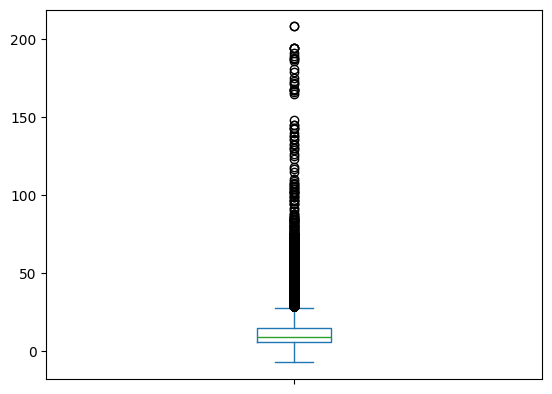

In [64]:
delivery_time.apply(lambda x: x.days).plot.box()

# Fazendo join nos datasets

In [65]:
df_join_order_payment = pd.merge(df_orders, df_payments, 
                                how='inner', 
                                left_on='order_id', right_on='order_id')

In [66]:
df_join_order_payment['order_approved_at'] = pd.to_datetime(df_join_order_payment['order_approved_at'])

In [67]:
df_join_order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 12 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       103886 non-null  object        
 1   customer_id                    103886 non-null  object        
 2   order_status                   103886 non-null  object        
 3   order_purchase_timestamp       103886 non-null  object        
 4   order_approved_at              103711 non-null  datetime64[ns]
 5   order_delivered_carrier_date   101998 non-null  object        
 6   order_delivered_customer_date  100754 non-null  object        
 7   order_estimated_delivery_date  103886 non-null  object        
 8   payment_sequential             103886 non-null  int64         
 9   payment_type                   103886 non-null  object        
 10  payment_installments           103886 non-null  int64         
 11  

# Pergunta 2:
Identificar qual o mês com maior quantidade de vendas (em número de pedido) e o mês com os maiores
pagamentos (pagamentos);

In [68]:
df_join_order_payment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12


In [69]:
df_join_order_payment['mes'] = df_join_order_payment['order_approved_at'].dt.month

In [70]:
df_join_order_payment.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,mes
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,10.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,10.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,10.0
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,boleto,1,141.46,7.0
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,credit_card,3,179.12,8.0


In [71]:
df_join_order_payment[df_join_order_payment['order_id'] == 'e481f51cbdc54678b7cc49136f2d6af7']

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,mes
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,credit_card,1,18.12,10.0
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,3,voucher,1,2.00,10.0
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,2,voucher,1,18.59,10.0


In [72]:
(
    df_join_order_payment
    .drop_duplicates(subset='order_id')
    .groupby('mes')
    .count()[['order_id']]
    .sort_values('order_id', ascending=False)
    .iloc[0]
)

order_id    10968
Name: 8.0, dtype: int64

In [73]:
(
    df_join_order_payment
    .drop_duplicates(subset='order_id')
    .groupby(pd.Grouper(key='order_approved_at', freq='ME'))
    .count()[['order_id']]
    .sort_values('order_id', ascending=False)
    .iloc[0:5]
)

,order_id
order_approved_at,
2017-11-30,7395
2018-03-31,7288
2018-01-31,7187
2018-05-31,7066
2018-04-30,6778


In [74]:
(
    df_join_order_payment
    .groupby(pd.Grouper(key='order_approved_at', freq='ME'))
    .sum()[['payment_value']]
    .sort_values('payment_value', ascending=False)
    .iloc[0:5]
)

,payment_value
order_approved_at,
2018-05-31,1180152.88
2017-11-30,1174911.51
2018-03-31,1170383.27
2018-04-30,1137693.93
2018-01-31,1106076.67


# 3. Avalie a satisfação dos clientes: i) notas; ii) estão realizando comentários?

In [75]:
df_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
2,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
3,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
4,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13


In [76]:
df_agg_reviw_score = df_reviews.groupby('review_score').agg(
    {"review_comment_message": "count", 
     "review_id": "count"}
)
df_agg_reviw_score

,review_comment_message,review_id
review_score,,
1,16054,20740
2,3895,5659
3,6436,14539
4,10429,33324
5,35922,100028


In [77]:
df_agg_reviw_score['percent_comments'] = df_agg_reviw_score['review_comment_message']/df_agg_reviw_score['review_id']

In [78]:
df_agg_reviw_score

,review_comment_message,review_id,percent_comments
review_score,,,
1,16054,20740,0.774060
2,3895,5659,0.688284
3,6436,14539,0.442671
4,10429,33324,0.312958
5,35922,100028,0.359119


In [79]:
df_agg_reviw_score['percent_comments'].mean()

0.5154184894265695

In [80]:
df_agg_reviw_score['review_comment_message'].sum()/df_agg_reviw_score['review_id'].sum()

0.4173274427678008

In [81]:
df_agg_reviw_score.reset_index().corr(method='spearman')

,review_score,review_comment_message,review_id,percent_comments
review_score,1.0,0.4,0.7,-0.9
review_comment_message,0.4,1.0,0.9,-0.2
review_id,0.7,0.9,1.0,-0.6
percent_comments,-0.9,-0.2,-0.6,1.0


In [82]:
df_agg_reviw_score['percent_score'] = df_agg_reviw_score['review_id']/df_agg_reviw_score['review_id'].sum()

In [83]:
df_agg_reviw_score

,review_comment_message,review_id,percent_comments,percent_score
review_score,,,,
1,16054,20740,0.774060,0.118997
2,3895,5659,0.688284,0.032469
3,6436,14539,0.442671,0.083418
4,10429,33324,0.312958,0.191199
5,35922,100028,0.359119,0.573917


In [84]:
df_agg_reviw_score = df_agg_reviw_score.reset_index() 

In [85]:
df_agg_reviw_score['groupped_score'] = df_agg_reviw_score.apply(
    lambda x: "Menor igual 3" if x['review_score'] <=3 else "Entre 4 e 5", axis=1
)

In [86]:
df_agg_reviw_score.reset_index()

,index,review_score,review_comment_message,review_id,percent_comments,percent_score,groupped_score
0,0,1,16054,20740,0.774060,0.118997,Menor igual 3
1,1,2,3895,5659,0.688284,0.032469,Menor igual 3
2,2,3,6436,14539,0.442671,0.083418,Menor igual 3
3,3,4,10429,33324,0.312958,0.191199,Entre 4 e 5
4,4,5,35922,100028,0.359119,0.573917,Entre 4 e 5


In [87]:
df_agg_reviw_score.groupby('groupped_score').sum()[['percent_score']]

,percent_score
groupped_score,
Entre 4 e 5,0.765116
Menor igual 3,0.234884


In [88]:
# 23% dos clientes estão insatisfeitos, o que pode indicar que devemos fazer uma atuação específica para melhorar essas notas

# 4. Existe algum padrão entre a satisfação do cliente com a entrega antes ou depois do prazo previsto?

In [89]:
df_merge_order_review = pd.merge(df_orders, df_reviews, on='order_id', how='left')
df_merge_order_review.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58


In [90]:
df_merge_order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175225 entries, 0 to 175224
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       175225 non-null  object 
 1   customer_id                    175225 non-null  object 
 2   order_status                   175225 non-null  object 
 3   order_purchase_timestamp       175225 non-null  object 
 4   order_approved_at              174941 non-null  object 
 5   order_delivered_carrier_date   172023 non-null  object 
 6   order_delivered_customer_date  169921 non-null  object 
 7   order_estimated_delivery_date  175225 non-null  object 
 8   review_id                      174290 non-null  object 
 9   review_score                   174290 non-null  float64
 10  review_comment_title           20246 non-null   object 
 11  review_comment_message         72736 non-null   object 
 12  review_creation_date          

In [91]:
# order_delivered_customer_date
# order_estimated_delivery_date
df_merge_order_review['order_delivered_customer_date'] = pd.to_datetime(df_merge_order_review['order_delivered_customer_date'])
df_merge_order_review['order_estimated_delivery_date'] = pd.to_datetime(df_merge_order_review['order_estimated_delivery_date'])

In [92]:
df_merge_order_review['order_delivered_customer_date_no_hours'] = df_merge_order_review['order_delivered_customer_date'].dt.date
df_merge_order_review['order_estimated_delivery_date_no_hours'] = df_merge_order_review['order_estimated_delivery_date'].dt.date

In [93]:
df_merge_order_review.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_delivered_customer_date_no_hours,order_estimated_delivery_date_no_hours
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,2017-10-10,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,2018-08-07,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58,2018-08-17,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,2017-12-02,2017-12-15
4,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,359d03e676b3c069f62cadba8dd3f6e8,5.0,NaN,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,2017-12-02,2017-12-15


In [94]:
def compare_dates(row):
    try:
        if (row['order_estimated_delivery_date_no_hours'] == row['order_delivered_customer_date_no_hours']):
            return "No prazo"
        elif (row['order_delivered_customer_date_no_hours'] < row['order_estimated_delivery_date_no_hours']):
            return "Adiantado"                                  
        else:
            return "Atrasado"
    except Exception as ex:
        return "Dados Nulos"

In [95]:

df_merge_order_review['delivery_status'] = df_merge_order_review.apply(compare_dates, axis=1)

In [96]:
df_merge_order_review.groupby('delivery_status')[['review_score']].mean()

,review_score
delivery_status,
Adiantado,4.282045
Atrasado,2.251902
Dados Nulos,1.744983
No prazo,4.020080


# 5. Quais as categorias de produtos mais vendidos? E os menos vendidos? Existe relação com os preços dos itens? A quantidade de fotos impacta nas vendas?

In [97]:
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [98]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [99]:
df_order_item_product = pd.merge(df_orders, df_items, 
                                 on='order_id',
                                 how='left')

df_order_item_product = pd.merge(df_order_item_product, df_products, 
                                 on='product_id', 
                                 how='left')

In [100]:
df_order_item_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113425 entries, 0 to 113424
Data columns (total 22 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       113425 non-null  object 
 1   customer_id                    113425 non-null  object 
 2   order_status                   113425 non-null  object 
 3   order_purchase_timestamp       113425 non-null  object 
 4   order_approved_at              113264 non-null  object 
 5   order_delivered_carrier_date   111457 non-null  object 
 6   order_delivered_customer_date  110196 non-null  object 
 7   order_estimated_delivery_date  113425 non-null  object 
 8   order_item_id                  112650 non-null  float64
 9   product_id                     112650 non-null  object 
 10  seller_id                      112650 non-null  object 
 11  shipping_limit_date            112650 non-null  object 
 12  price                         

In [101]:
df_order_item_product.groupby("product_category_name")[['order_id']].count().sort_values('order_id', ascending=False)

,order_id
product_category_name,
cama_mesa_banho,11115
beleza_saude,9670
esporte_lazer,8641
moveis_decoracao,8334
informatica_acessorios,7827
...,...
la_cuisine,14
cds_dvds_musicais,14
pc_gamer,9


In [102]:
df_order_item_product.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [103]:
df_order_item_product['product_id'].unique().shape

(32952,)

In [104]:
df_relacao_preco_quantidade = df_order_item_product.groupby('product_id').agg(
    {
        "product_id": "count",
        "price": "mean",
        "product_photos_qty": "mean"
    }
)
df_relacao_preco_quantidade.head()

,product_id,price,product_photos_qty
product_id,,,
00066f42aeeb9f3007548bb9d3f33c38,1,101.65,6.0
00088930e925c41fd95ebfe695fd2655,1,129.90,4.0
0009406fd7479715e4bef61dd91f2462,1,229.00,2.0
000b8f95fcb9e0096488278317764d19,2,58.90,3.0
000d9be29b5207b54e86aa1b1ac54872,1,199.00,4.0


In [105]:
df_relacao_preco_quantidade.corr('spearman')

,product_id,price,product_photos_qty
product_id,1.000000,-0.070690,0.015305
price,-0.070690,1.000000,0.080701
product_photos_qty,0.015305,0.080701,1.000000


In [106]:
df_order_item_product.groupby('product_photos_qty')['product_id'].count()

product_photos_qty
1.0     56028
2.0     21963
3.0     12392
4.0      8437
5.0      5368
6.0      3786
7.0      1501
8.0       727
9.0       313
10.0      342
11.0       71
12.0       53
13.0       30
14.0        6
15.0       12
17.0       11
18.0        4
19.0        2
20.0        1
Name: product_id, dtype: int64

# 6. O volume e o peso dos produtos impactam no valor do frete?

In [107]:
df_order_item_product.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,29.99,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,118.70,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,159.90,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,45.00,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,19.90,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0


In [108]:
df_order_item_product['volume'] = (df_order_item_product['product_length_cm'] * 
								   df_order_item_product['product_height_cm'] * 
								   df_order_item_product['product_width_cm'])

In [109]:
df_order_item_product.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,volume
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,87285b34884572647811a353c7ac498a,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1976.0
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,595fac2a385ac33a80bd5114aec74eb8,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,4693.0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,aa4383b373c6aca5d8797843e5594415,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,9576.0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,...,27.20,pet_shop,59.0,468.0,3.0,450.0,30.0,10.0,20.0,6000.0
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,65266b2da20d04dbe00c5c2d3bb7859e,...,8.72,papelaria,38.0,316.0,4.0,250.0,51.0,15.0,15.0,11475.0


In [110]:
df_order_item_product[['volume', 'product_weight_g', 'freight_value']].corr('spearman')

,volume,product_weight_g,freight_value
volume,1.000000,0.767701,0.368587
product_weight_g,0.767701,1.000000,0.446591
freight_value,0.368587,0.446591,1.000000


<Axes: xlabel='volume', ylabel='freight_value'>

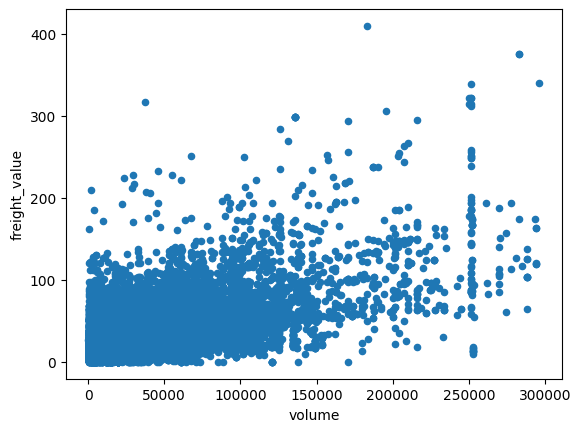

In [111]:
df_order_item_product.plot.scatter(x='volume', y='freight_value')

<Axes: xlabel='product_weight_g', ylabel='freight_value'>

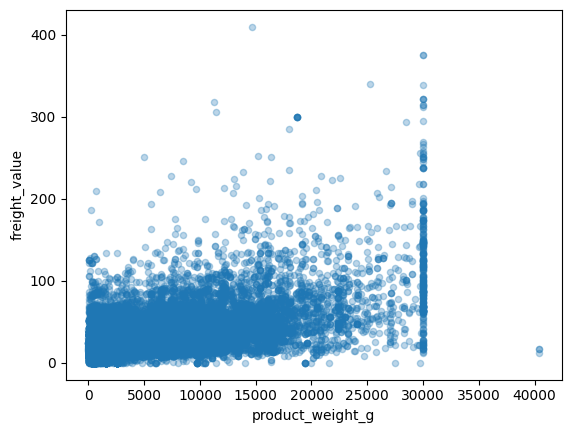

In [112]:
df_order_item_product.plot.scatter(x='product_weight_g', y='freight_value', alpha=0.3)

# 7. Avaliação/Visualização da posição geográfica onde se encontra a maior concentração de clientes e vendedores;

In [113]:
df_customer.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [114]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [115]:
df_customer_agg = (
    df_customer.groupby("customer_state")[['customer_id']].count()
                .reset_index()
                .rename({'customer_state': 'state'}, axis=1)
)

df_sellers_agg = (
    df_sellers.groupby("seller_state")[['seller_id']].count()
                .reset_index()
                .rename({'seller_state': 'state'}, axis=1)
)

df_customer_seller = pd.merge(df_customer_agg, df_sellers_agg, on='state')

<Axes: xlabel='state'>

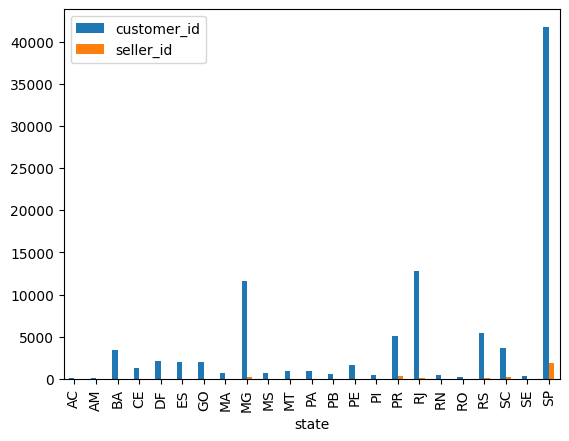

In [116]:
df_customer_seller.set_index('state').plot.bar()

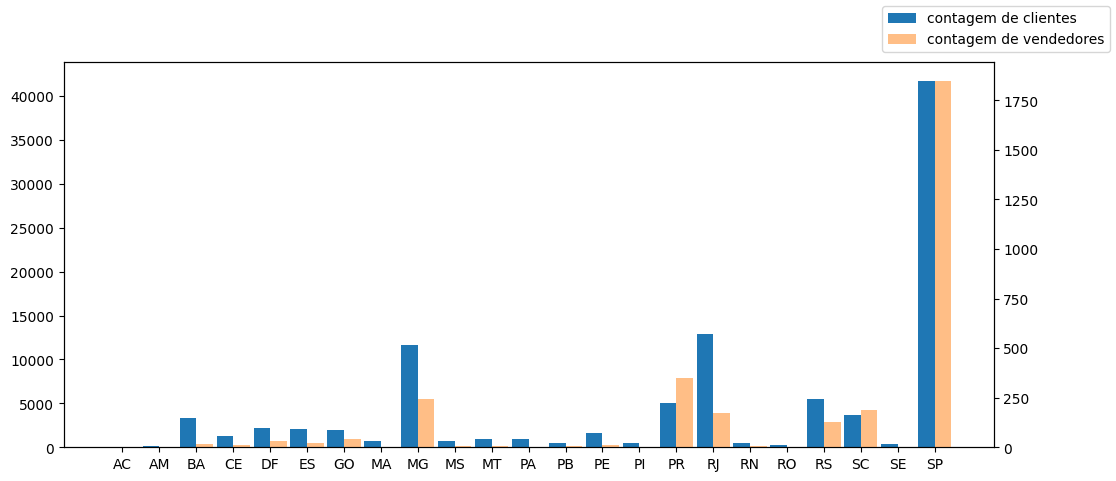

In [117]:
fig, ax = plt.subplots(figsize=(12, 5))

ind = np.arange(df_customer_seller['state'].nunique())
width = 0.45

ax.bar(x=ind, height=df_customer_seller['customer_id'], label='contagem de clientes', width=width)
ax_r = ax.twinx()
ax_r.bar(x=ind+width, height=df_customer_seller['seller_id'], color='C1', alpha=0.5, label='contagem de vendedores', width=width)
plt.xticks(ind + width / 2, df_customer_seller['state'].unique())
fig.legend()

# 8. As entregas atrasadas aconteceram entre vendedores/compradores de estados diferentes?

In [134]:
df_order_delivey_status = df_merge_order_review[['order_id', 'delivery_status', 'customer_id']]

df_order_item_status = pd.merge(df_order_delivey_status, df_items, on='order_id')

df_order_states = pd.merge(df_order_item_status, df_sellers, on='seller_id')

df_order_states = pd.merge(df_order_states, df_customer, on='customer_id')

df_order_states = df_order_states[['order_id', 'delivery_status', 'seller_state', 'customer_state']]

df_order_states['is_diffent_states'] = (df_order_states['seller_state'] != df_order_states['customer_state'])

In [135]:

df_order_states.head()

,order_id,delivery_status,seller_state,customer_state,is_diffent_states
0,e481f51cbdc54678b7cc49136f2d6af7,Adiantado,SP,SP,False
1,53cdb2fc8bc7dce0b6741e2150273451,Adiantado,SP,BA,True
2,47770eb9100c2d0c44946d9cf07ec65d,Adiantado,SP,GO,True
3,949d5b44dbf5de918fe9c16f97b45f8a,Adiantado,MG,RN,True
4,949d5b44dbf5de918fe9c16f97b45f8a,Adiantado,MG,RN,True


In [142]:
df_orders_atrasadas = df_order_states.loc[df_order_states['delivery_status'] == 'Atrasado']
(
    df_orders_atrasadas
    .groupby('is_diffent_states')['order_id'].count()*100/df_orders_atrasadas.shape[0]
)

is_diffent_states
False    23.909127
True     76.090873
Name: order_id, dtype: float64

In [146]:
df_orders_no_prazo_adiantado = df_order_states.loc[df_order_states['delivery_status'].isin(['No prazo', 'Adiantado'])]
(
    df_orders_no_prazo_adiantado
    .groupby('is_diffent_states')['order_id'].count()*100/df_orders_no_prazo_adiantado.shape[0]
)

is_diffent_states
False    37.048723
True     62.951277
Name: order_id, dtype: float64